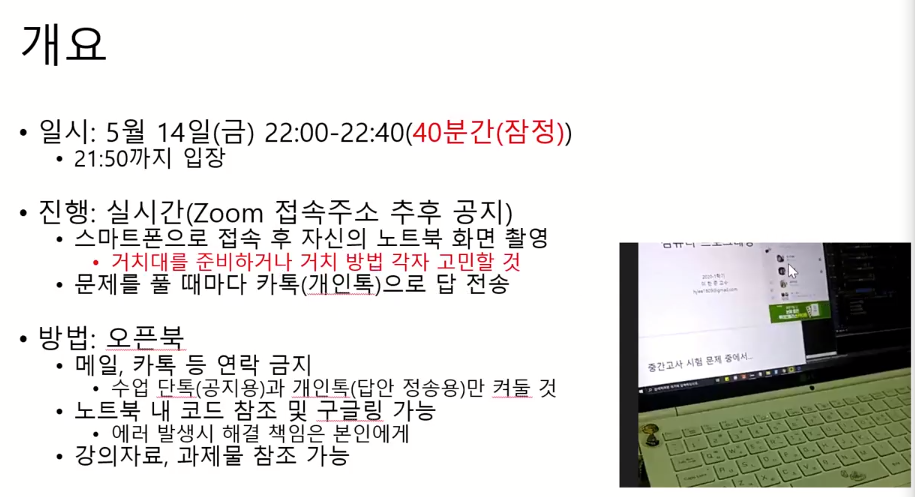

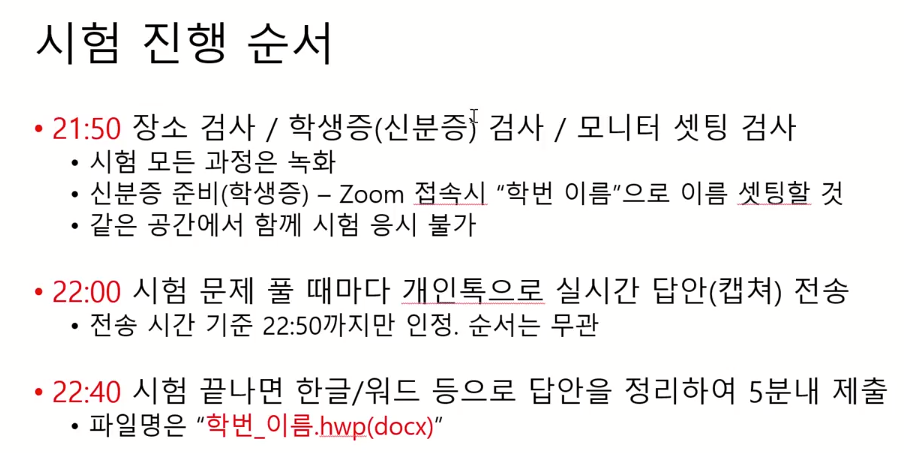

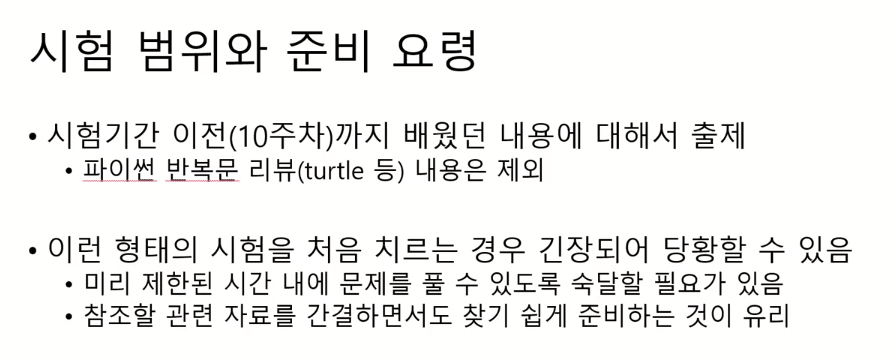

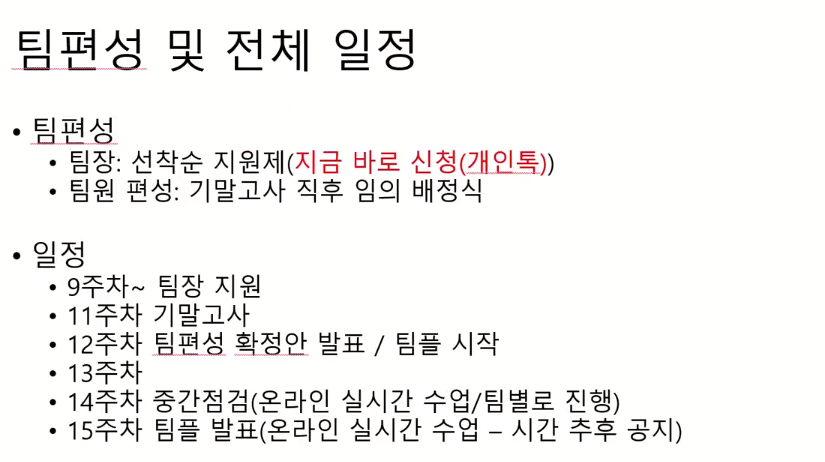

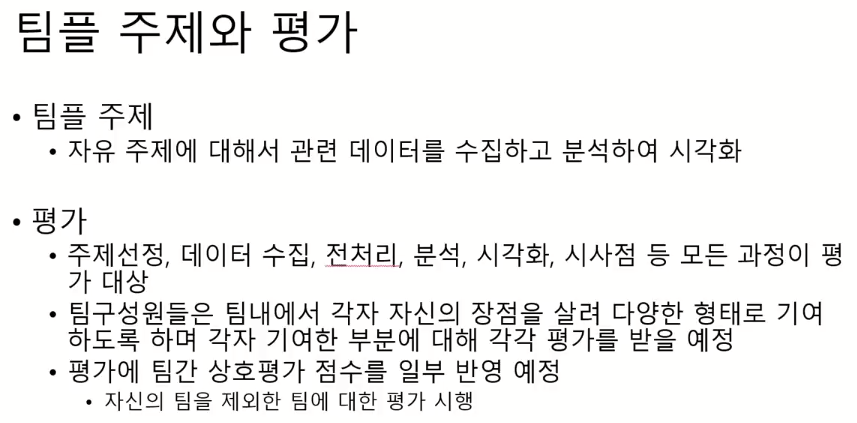

# input_format
---

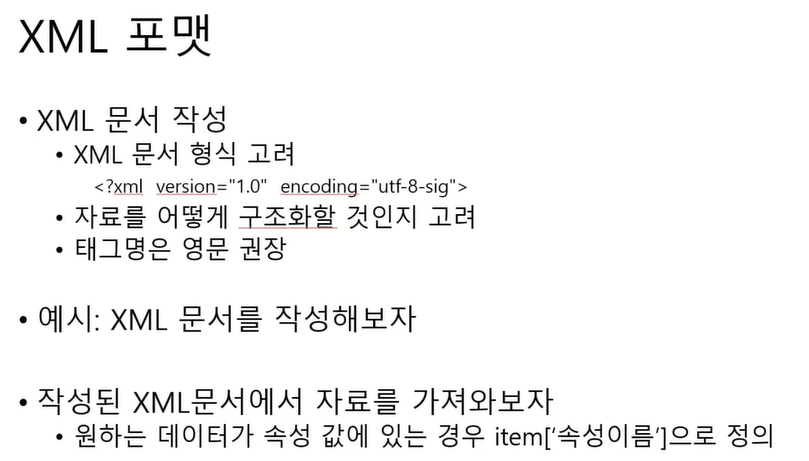

HTML은 각 태그의 기능이 predefined,

XML 태그는 태그명, 속성명 등을 사용자가 정의할 수 있기 때문에 자유도가 높다.

**다음의 txt를 xml로 변환해보자**

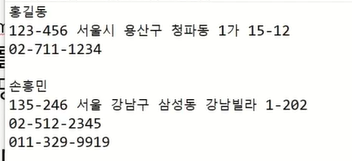

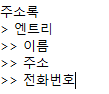

사람을 엔트리로 보면 위와 같이 구조화 시킬 수 있다.

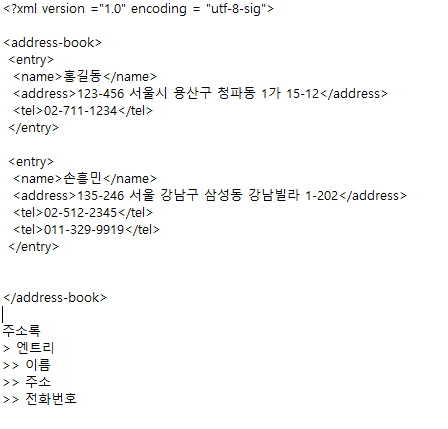

**위와 같이 XML 형식으로 변환 가능**

`위와 같이 저장하면 추후 세부 주소를 검색하기 제한될 수 있다.`

이런 경우 주소 데이터를 분할해서 저장 가능


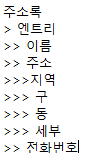

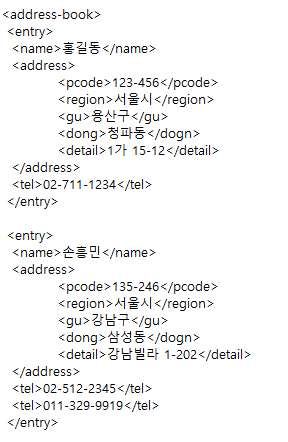

모든파일로 저장!

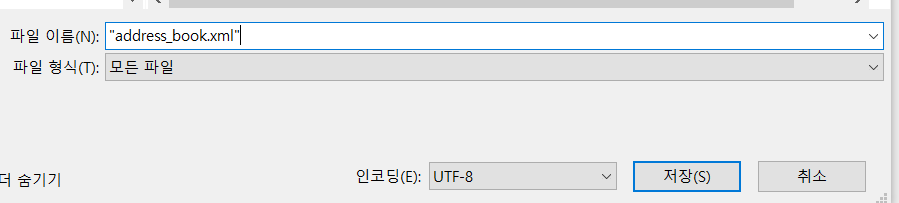

In [6]:
# 위 xml 파일의 encoding 방식을 utf-8-sig로 저장했는데 읽을때는 utf-8-sig가 맞지만 저장은 utf-8이 맞음, 생략해도 무방(수정사항)

# XML 읽기
---

In [7]:
from bs4 import BeautifulSoup

data_file = open('../data/address_book.xml', 'r', encoding='utf-8-sig')
soup = BeautifulSoup(data_file, 'xml')

soup

<?xml version="1.0" encoding="utf-8"?>
<address-book>
<entry>
<name>홍길동</name>
<address>
<pcode>123-456</pcode>
<region>서울시</region>
<gu>용산구</gu>
<dong>청파동</dong>
<detail>1가 15-12</detail>
</address>
<tel>02-711-1234</tel>
</entry>
<entry>
<name>손흥민</name>
<address>
<pcode>135-246</pcode>
<region>서울시</region>
<gu>강남구</gu>
<dong>삼성동</dong>
<detail>강남빌라 1-202</detail>
</address>
<tel>02-512-2345</tel>
<tel>011-329-9919</tel>
</entry>
</address-book>

XML 특성 상 문서 작성자에 따라 XML의 형태가 달라질 수 있다.

위의 경우 이름은 별도의 태그로 만들어줬는데 별도의 속성값으로도 정의할 수 있다.

In [8]:
from bs4 import BeautifulSoup

data_file = open('../data/address_book.xml', 'r', encoding='utf-8-sig')
soup = BeautifulSoup(data_file, 'xml')

soup

<?xml version="1.0" encoding="utf-8"?>
<address-book>
<entry name="홍길동">
<address>
<pcode>123-456</pcode>
<region>서울시</region>
<gu>용산구</gu>
<dong>청파동</dong>
<detail>1가 15-12</detail>
</address>
<tel>02-711-1234</tel>
</entry>
<entry name="송흥민">
<address>
<pcode>135-246</pcode>
<region>서울시</region>
<gu>강남구</gu>
<dong>삼성동</dong>
<detail>강남빌라 1-202</detail>
</address>
<tel>02-512-2345</tel>
<tel>011-329-9919</tel>
</entry>
</address-book>

# XML 이름 태그 가져오기
---

우리가 가져오고 싶은 것은 이름값이다. entry 태그안에 들어있다.

In [9]:
items = soup.select('entry')
items

[<entry name="홍길동">
 <address>
 <pcode>123-456</pcode>
 <region>서울시</region>
 <gu>용산구</gu>
 <dong>청파동</dong>
 <detail>1가 15-12</detail>
 </address>
 <tel>02-711-1234</tel>
 </entry>,
 <entry name="송흥민">
 <address>
 <pcode>135-246</pcode>
 <region>서울시</region>
 <gu>강남구</gu>
 <dong>삼성동</dong>
 <detail>강남빌라 1-202</detail>
 </address>
 <tel>02-512-2345</tel>
 <tel>011-329-9919</tel>
 </entry>]

In [11]:
# enty 안에 있는 name에 들어있는 속성값 출력

for item in items:
    print(item['name'])

홍길동
송흥민


# XML 포맷
---

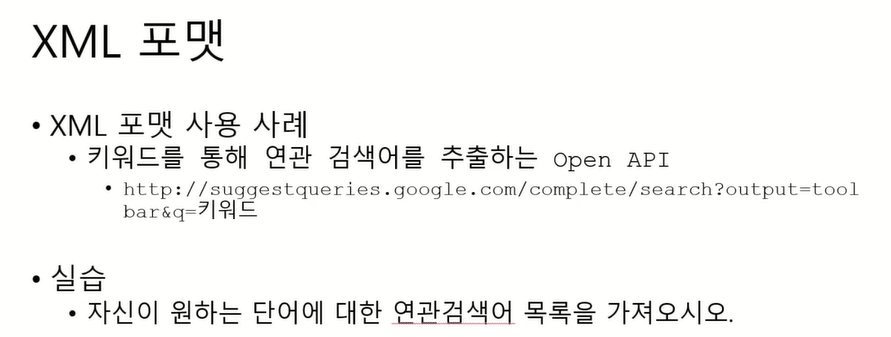

구글의 open API 사용하면 키워드를 통해 연관 검색어 추출이 가능


http://suggestqueries.google.com/complete/search?output=toolbar&q="키워드"

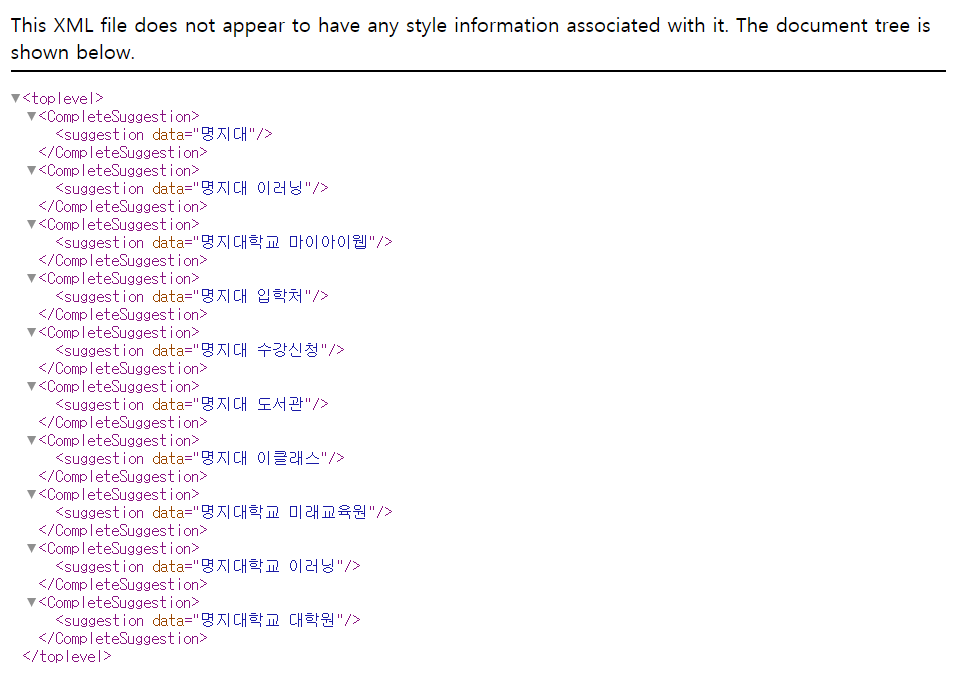

명지대를 검색하면 관련된 키워드로 구성된 XML 파일을 확인 가능

각각의 연관 검색어는 data라는 속성의 값으로 들어감

이를 활용하여 특정 키워드에 대한 연관검색어를 추출할 수 있다.

# API를 활용하여 데이터 추출
---

In [23]:
from bs4 import BeautifulSoup
import requests

# 연관검색어 API 결과 추출

keyword = '빅데이터'
api = 'http://suggestqueries.google.com/complete/search?output=toolbar&q='+keyword
print("------------------------------response---------------------------------")

response = requests.get(api)
print(response)
print("------------------------------soup---------------------------------")

soup = BeautifulSoup(response.content, 'xml')
print(soup)

datas = soup.select('suggestion')

print("------------------------------suggestions---------------------------------")
for item in datas:
    print(item['data'])

------------------------------response---------------------------------
<Response [200]>
------------------------------soup---------------------------------
<?xml version="1.0" encoding="utf-8"?>
<toplevel><CompleteSuggestion><suggestion data="빅데이터"/></CompleteSuggestion><CompleteSuggestion><suggestion data="빅데이터분석기사"/></CompleteSuggestion><CompleteSuggestion><suggestion data="빅데이터 분석"/></CompleteSuggestion><CompleteSuggestion><suggestion data="빅데이터 활용 사례"/></CompleteSuggestion><CompleteSuggestion><suggestion data="빅데이터분석기사 후기"/></CompleteSuggestion><CompleteSuggestion><suggestion data="빅데이터 플랫폼"/></CompleteSuggestion><CompleteSuggestion><suggestion data="빅데이터 전문가"/></CompleteSuggestion><CompleteSuggestion><suggestion data="빅데이터 자격증"/></CompleteSuggestion><CompleteSuggestion><suggestion data="빅데이터란"/></CompleteSuggestion><CompleteSuggestion><suggestion data="빅데이터분석기사 실기"/></CompleteSuggestion></toplevel>
------------------------------suggestions---------------------------------
빅데이터
빅데

# JSON
---

## JSON 데이터 포맷

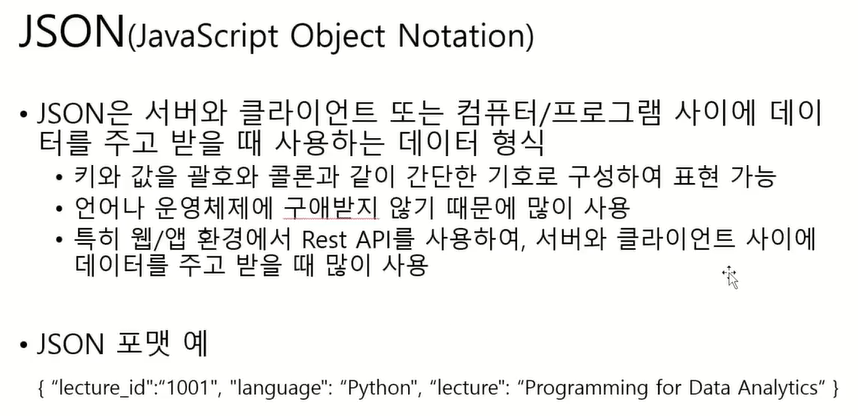

## JSON 데이터 포맷 읽기


* json 라이브러리 제공

**json.loads() 함수로 문자열로 이루어진 json 데이터를 dictionary처럼 다룰 수 있다.**

In [24]:
import json

In [25]:
# 문자열로 구성된 데이터를 입력받아 json 포맷으로 변환
data = '{"id":"1001", "language":"Python", "title":"Programming for Data Analytics"}'
jsondata = json.loads(data)
jsondata

{'id': '1001', 'language': 'Python', 'title': 'Programming for Data Analytics'}

In [27]:
jsondata['id'] # 마치 딕셔너리를 다루듯이 키값을 통해 해당 value를 확인할 수 있다.

'1001'

In [28]:
jsondata['language']

'Python'

In [30]:
type(jsondata) # jsondata의 type은 dictionary이다

dict

In [33]:
# 딕셔너리로 구성된 데이터를 입력받아 json 포맷으로 변환해보자

data = {"id":"1001", "language":"Python", "title":"Programming for Data Analytics"}
type(data)

dict

In [34]:
# json.loads는 string을 받는다.

jsondata = json.loads(data)

TypeError: the JSON object must be str, bytes or bytearray, not dict

In [37]:
# 이 경우에는 json.dumps를 사용

jsondata = json.dumps(data)
jsondata

'{"id": "1001", "language": "Python", "title": "Programming for Data Analytics"}'

In [39]:
# dumps를 사용한 jsondata는 string 데이터 타입

type(jsondata)

str

In [43]:
# 딕셔너리로 구성된 데이터에서 값에 문자열이 아닌 딕셔너리가 들어간 형태라면?

data = {"id":"1001", "language":{"Python":"basic", "JAVA":"advance"}, "title":"Programming for Data Analytics"}
type(data)

dict

In [46]:
jsondata = json.dumps(data)
type(jsondata)

str

* 형태는 좀 복잡하지만 현실에는 위와 같이 계층적 구조로 이루어진 데이터가 많다

In [50]:
# 계층 구조를 확인하려면 indnt를 지정

jsondata = json.dumps(data, indent = 2)
print(jsondata)

{
  "id": "1001",
  "language": {
    "Python": "basic",
    "JAVA": "advance"
  },
  "title": "Programming for Data Analytics"
}


## json.dump() 함수로 파이썬 dict 데이터를 파일로 써보자

In [51]:
data = {"id":"1001", "language":"Python", "title":"Programming for Data Analytics"}

data['language'] = ['java', 'C']

# language 키의 value에는 java, c를 원소로 갖는 리스트가 들어가 있음.
data

{'id': '1001',
 'language': ['java', 'C'],
 'title': 'Programming for Data Analytics'}

In [53]:
# 데이터를 파일로 써보자
with open('../data/test_json.json', 'w', encoding='utf-8-sig') as json_file:
    json.dump(data, json_file, indent=2)

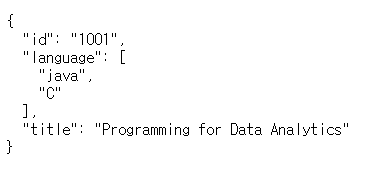

In [69]:
# 위에서 저장된 파일을 읽어보자
with open('../data/test_json.json', 'r', encoding='utf-8-sig') as json_file:
    json_data = json.load(json_file)
    
json_data

{'id': '1001',
 'language': ['java', 'C'],
 'title': 'Programming for Data Analytics'}

## json.load() 함수를 이용해 파일로 된 json 데이터를 사전처럼 다룰 수 있다.

In [71]:
# json.load()

with open('../data/test_json.json', 'r', encoding='utf-8-sig') as json_file:
    json_data = json.load(json_file) # 파일로 된 json 데이터를 딕셔너리로 가져오기(load)
                                    # loads 는 문자열로 된 json 데이터를 딕셔너리로 가져올 때 사용
    
json_data

{'id': '1001',
 'language': ['java', 'C'],
 'title': 'Programming for Data Analytics'}

In [78]:
#json_data의 타입은 dict

type(json_data)

dict

In [79]:
# 로드된 json 데이터의 key 값을 확인

json_data.keys()

dict_keys(['id', 'language', 'title'])

In [80]:
# 로드된 json 데이터의 value 값을 확인

json_data.values()

dict_values(['1001', ['java', 'C'], 'Programming for Data Analytics'])

In [83]:
# 반복문을 통해 하위 구조의 데이터를 추출

with open('../data/test_json.json', 'r', encoding='utf-8-sig') as json_file:
    json_data = json.load(json_file) 
    for item in json_data['language']:
        print(item)

java
C


# BeautifulSoup
---

* BeautifulSoup은 웹문서(HMTL, XML) 로부터 데이터를 추출하기 위해 사용되는 라이브러리이다.

In [86]:
# 라이브러리 로드

from bs4 import BeautifulSoup

In [96]:
# 네이버 웹툰 url 지정
url = 'https://comic.naver.com/webtoon/weekday.nhn'

response = requests.get(url)
print(response)

soup = BeautifulSoup(response.content, 'html')

print(soup)

<Response [200]>
<!DOCTYPE html>
<html lang="ko">
<head>
<meta content="IE=edge,chrome=1" http-equiv="X-UA-Compatible"/>
<meta content="text/html; charset=utf-8" http-equiv="Content-type"/>
<title>네이버 만화 &gt; 요일별  웹툰 &gt; 전체웹툰</title>
<meta content="네이버 웹툰" property="og:title"/>
<meta content="https://ssl.pstatic.net/static/comic/images/og_tag_v2.png" property="og:image"/>
<meta content="매일매일 새로운 재미, 네이버 웹툰." property="og:description"/>
<meta content="https://comic.naver.com/webtoon/weekday.nhn" property="og:url"/>
<meta content="article" property="og:type"/>
<meta content="네이버 웹툰" property="og:article:author"/>
<meta content="https://comic.naver.com" property="og:article:author:url"/>
<link href="https://ssl.pstatic.net/static/comic/favicon/webtoon_favicon_32x32.ico" rel="shortcut icon" type="image/x-icon"/>
<script type="text/javascript">
		document.domain = "naver.com";
	</script>
<link href="/css/comic/comic_20210426161105.css" rel="stylesheet" style="text/css"/>
<!-- comicWeekdayJ

In [113]:
# 계층 구조를 직관적으로 확인하고 싶다면 prettify() 함수 사용

print(soup.prettify())

<!DOCTYPE html>
<html lang="ko">
 <head>
  <meta content="IE=edge,chrome=1" http-equiv="X-UA-Compatible"/>
  <meta content="text/html; charset=utf-8" http-equiv="Content-type"/>
  <title>
   네이버 만화 &gt; 요일별  웹툰 &gt; 전체웹툰
  </title>
  <meta content="네이버 웹툰" property="og:title"/>
  <meta content="https://ssl.pstatic.net/static/comic/images/og_tag_v2.png" property="og:image"/>
  <meta content="매일매일 새로운 재미, 네이버 웹툰." property="og:description"/>
  <meta content="https://comic.naver.com/webtoon/weekday.nhn" property="og:url"/>
  <meta content="article" property="og:type"/>
  <meta content="네이버 웹툰" property="og:article:author"/>
  <meta content="https://comic.naver.com" property="og:article:author:url"/>
  <link href="https://ssl.pstatic.net/static/comic/favicon/webtoon_favicon_32x32.ico" rel="shortcut icon" type="image/x-icon"/>
  <script type="text/javascript">
   document.domain = "naver.com";
  </script>
  <link href="/css/comic/comic_20210426161105.css" rel="stylesheet" style="text/css"/>

In [116]:
# title 태그

soup.title

<title>네이버 만화 &gt; 요일별  웹툰 &gt; 전체웹툰</title>

In [117]:
# 태그의 name

soup.title.name

'title'

In [119]:
# title 태그의 내용

soup.title.text

'네이버 만화 > 요일별  웹툰 > 전체웹툰'

In [122]:
# 상위태그(head)의 name을 가져와보자

soup.title.parent.name

'head'

In [123]:
# 상위태그의 상위태그를 구해보자 html>head>title

soup.title.parent.parent.name

'html'

In [129]:
# 동일한 태그가 여러번 나오는 경우에는 가장 위에 있는 태그를 반환

soup.p

<p class="author2"><a href="#" onclick="nclk_v2(event,'mom.artist','769987','1'); return artistAction.viewArtist('769987', this);" title="석한">
							석한</a></p>

In [133]:
# 특정 속성에 해당하는 값을 가져오고 싶은 경우
# p태그의 class 속성 값을 추출

soup.p['class']

['author2']

In [134]:
soup.a

<a href="#menu" onclick="document.getElementById('menu').tabIndex=-1;document.getElementById('menu').focus();return false;"><span>메인 메뉴로 바로가기</span></a>

In [138]:
# soup.find() : 인자로 넘기는 문자열에 해당하는 태그 내용 반환

soup.find('a')

<a href="#menu" onclick="document.getElementById('menu').tabIndex=-1;document.getElementById('menu').focus();return false;"><span>메인 메뉴로 바로가기</span></a>

In [140]:
# soup.find_all() : 인자로 넘기는 문자열에 해당하는 모든 태그 내용 반환

soup.find_all('a')

[<a href="#menu" onclick="document.getElementById('menu').tabIndex=-1;document.getElementById('menu').focus();return false;"><span>메인 메뉴로 바로가기</span></a>,
 <a href="#content" onclick="document.getElementById('content').tabIndex=-1;document.getElementById('content').focus();return false;"><span>본문으로 바로가기</span></a>,
 <a class="Ntxt_naver " href="https://www.naver.com" onclick="nclk_v2(event,'STA.naverlogo')" title="NAVER">NAVER</a>,
 <a class="Ntxt_comic" href="/index.nhn" onclick="nclk_v2(event,'STA.comic')" title="만화">만화</a>,
 <a class="Ntxt_novel" href="https://novel.naver.com" onclick="nclk_v2(event,'STA.novel')" title="웹소설">웹소설</a>,
 <a href="https://comic.naver.com/webtoon/list.nhn?titleId=771018" onclick="nclk_v2(event,'STA.txt')" title="즐거운 동아리 활동 &lt;찐:종합게임동아리&gt;">
 <span class="Nico_notice"></span>
 										즐거운 동아리 활동 &lt;찐:종합게임동아리&gt;
 									</a>,
 <a href="/index.nhn" onclick="nclk_v2(event,'LNB.home');"><span class="Ntxt_home">웹툰 홈</span></a>,
 <a href="/webtoon/weekd

In [150]:
# 반복문을 통해 a태그에 해당하는 모든 내용을 추출

items = soup.find_all('a')

for item in items:
    print(item.text)

메인 메뉴로 바로가기
본문으로 바로가기
NAVER
만화
웹소설


										즐거운 동아리 활동 <찐:종합게임동아리>
									
웹툰 홈
웹툰
베스트 도전
도전만화
마이페이지
단행본 만화
장르소설
요일별
장르별
작품별
작가별
연도별
테마웹툰
완결웹툰
요일전체
월요웹툰
화요웹툰
수요웹툰
목요웹툰
금요웹툰
토요웹툰
일요웹툰




하나in세인

							석한




반드시 해피엔딩

							플아다, 불사 / 재림




거래

							우남20
인기순
업데이트순
조회순
별점순



참교육



뷰티풀 군바리



소녀의 세계



윈드브레이커



장씨세가 호위무사



파이게임



만렙돌파


NEW

삼매경



잔불의 기사



칼가는 소녀


NEW

황제와의 하룻밤



요리GO


NEW

수영만화일기



유일무이 로맨스



아는 여자애



오늘의 순정망화



히어로메이커



야생천사 보호구역


NEW

살아간다



싸이코 리벤지



브랜든



리턴 투 플레이어



결혼생활 그림일기



평범한 8반



사장님을 잠금해제



착한건 돈이된다



바이러스X


NEW

기사님을 지켜줘



순정말고 순종



꿈의 기업



선배, 그 립스틱 바르지 마요


NEW

사막에 핀 달



왕따협상



마지막 지수



두근두근 네가 좋아서


18세 이상 이용 가능

침범



피플


휴재

앵무살수



그림자 신부



개밥 먹는 남자



원하는 건 너 하나



라서드



정보전사 202



이중첩자



이탄국의 자청비



뱀파이어의 꽃


휴재

와이키키 뱀파이어



백호랑



중독연구소



오로지 오로라



드로잉 레시피



인간의 온도



하슬라



트리거



보살님이 캐리해!



헬로맨스


휴재

바른연애 길잡이




여신강림




엽총소년




한림체육관




하루만 네가 되고 싶어




랜덤채팅의 그녀!




사신소년


18세 이상 이용 가능




In [152]:
# select를 사용하면 더 쉽게 접근 가능
# 개인적으로는 select를 주로 사용


# 웹툰 제목 추출
items = soup.select('a.title')

for item in items:
    print(item.text)

참교육
뷰티풀 군바리
소녀의 세계
윈드브레이커
장씨세가 호위무사
파이게임
만렙돌파
삼매경
잔불의 기사
칼가는 소녀
황제와의 하룻밤
요리GO
수영만화일기
유일무이 로맨스
아는 여자애
오늘의 순정망화
히어로메이커
야생천사 보호구역
살아간다
싸이코 리벤지
브랜든
리턴 투 플레이어
결혼생활 그림일기
평범한 8반
사장님을 잠금해제
착한건 돈이된다
바이러스X
기사님을 지켜줘
순정말고 순종
꿈의 기업
선배, 그 립스틱 바르지 마요
사막에 핀 달
왕따협상
마지막 지수
두근두근 네가 좋아서
침범
피플
앵무살수
그림자 신부
개밥 먹는 남자
원하는 건 너 하나
라서드
정보전사 202
이중첩자
이탄국의 자청비
뱀파이어의 꽃
와이키키 뱀파이어
백호랑
중독연구소
오로지 오로라
드로잉 레시피
인간의 온도
하슬라
트리거
보살님이 캐리해!
헬로맨스
바른연애 길잡이
여신강림
엽총소년
한림체육관
하루만 네가 되고 싶어
랜덤채팅의 그녀!
사신소년
헬58
신도림
삼국지톡
호랑이 들어와요
달콤살벌한 부부
오피스 누나 이야기
원주민 공포만화
위아더좀비
집이 없어
하우스키퍼
윌유메리미
오늘의 순정망화
견우와 선녀
급식러너
아이즈
용왕님의 셰프가 되었습니다
악인
빌런투킬
플레이, 플리
대신 심부름을 해다오
성인초딩
3cm 헌터
나타나주세요!
빅맨
그녀석 정복기
아이레
은주의 방 2~3부
올가미
제로게임
하나in세인
별종
숲속의 담
연우의 순정
오파츠
열녀박씨 계약결혼뎐
태시트
빛빛빛
자판귀
언메이크
조선홍보대행사 조대박
안식의 밤
완벽한 가족
중증외상센터 : 골든 아워
필살VS로맨스
도를 아십니까
풋내기들
나의 플랏메이트
피로만땅
인문학적 감수성
몬스터
찐:종합게임동아리
고수
전지적 독자 시점
급식아빠
복학왕
모죠의 일지
격기3반
튜토리얼 탑의 고인물
캐슬
세상은 돈과 권력
노곤하개
화산귀환
하렘의 남자들
여주실격!
일렉시드
연놈
남주의 첫날밤을 가져버렸다
원수를 사랑하라
닥터앤닥터 육아일기
고삼무쌍
나쁜사람
엔딩 후 서브남을 주웠다
빌드업
판타지 여동생!
마른 가지에 바람처럼
귀곡의 문
마녀와 용의 신

# 과제
---

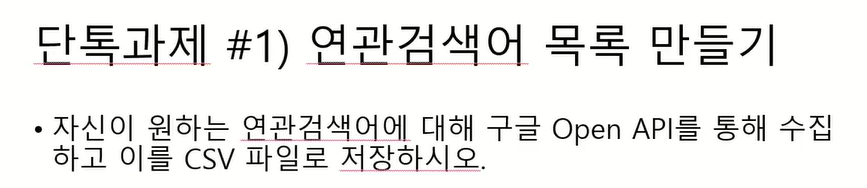

In [247]:
import pandas as pd
from bs4 import BeautifulSoup
import requests

# 연관검색어 API 결과 추출

keyword = '파이썬'
api = 'http://suggestqueries.google.com/complete/search?output=toolbar&q='+keyword

response = requests.get(api)
print(response)

soup = BeautifulSoup(response.content, 'xml')

datas = soup.select('suggestion')

suggest_list=[]


# 데이터 추출 및 csv 저장
for item in datas:
    print(item['data'])
    suggest_list.append(item['data'])

df = pd.DataFrame(suggest_list)
df.columns=['연관검색어']
df.to_csv('../data/week9_hw1.csv', encoding='utf-8-sig', index=None)
df


<Response [200]>
파이썬
파이썬 설치
파이썬 for문
파이썬 다운로드
파이썬 딕셔너리
파이썬 리스트
파이썬 주석
파이썬 연산자
파이썬 split
파이썬 함수


,연관검색어
0,파이썬
1,파이썬 설치
2,파이썬 for문
3,파이썬 다운로드
4,파이썬 딕셔너리
5,파이썬 리스트
6,파이썬 주석
7,파이썬 연산자
8,파이썬 split
9,파이썬 함수


---

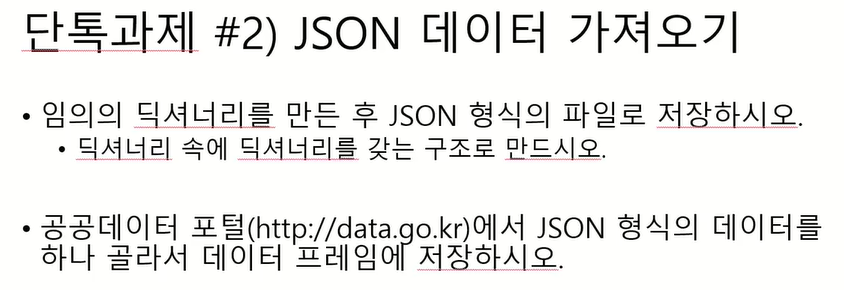

In [256]:
data = {
    "StudentID":"60161051",
    "name":"김동현",
    "gender":"male",
    "TechStack":{
        "Python":{
            "DataAnalytics":"Pandas",
            "WEB":"django"
        },
        "JAVA":"WEB",
        "ABAP":"SAP ERP"
}}

# json형식으로 저장
with open('../data/week9_hw2-1.json', 'w', encoding='utf-8-sig') as json_file:
    json.dump(data, json_file, indent=3)

In [219]:
# 공공데이터포털의 충북 음식점 정보 json 파일

with open('../data/food.json', 'r', encoding='utf-8-sig') as json_file:
    json_data = json.load(json_file)
    
json_data['result']

df = pd.DataFrame(json_data['result'])
df.to_csv('../data/week9_hw2-2.csv', encoding='utf-8-sig', index=None)
df.head(2)

,zip,areaSe,lng,thumbImg,regDate,tourImg,hmpg,mainMenuInfo,telno,tourSe,tourNm,menuInfo,mobileTelno,tourUrl,adres,tourNo,lat,operTime,intrcn
0,,옥천군,127.567427,https://tour.chungbuk.go.kr/DATA/tour/main/thu...,20191008155656,https://tour.chungbuk.go.kr/DATA/tour/main/157...,None,돌솥밥정식,043-733-3292,밥맛좋은집,지선생쌈촌,영양돌솥밥정식\r\n우렁쌈밥\r\n삼겹쌈밥,0437333292,https://tour.chungbuk.go.kr/www/selectTourCntn...,충북 옥천군 옥천읍 옥천로 1666-11,2159,36.293696,11:00 ~ 21:30,"지선생쌈촌은 2017년에 지정된 음식점으로 향토음식경대회 특별상 수상, 한국외식업 ..."
1,,옥천군,127.638996,https://tour.chungbuk.go.kr/DATA/tour/main/thu...,20191008155415,https://tour.chungbuk.go.kr/DATA/tour/main/157...,None,갈치조림정식,043-733-1780,밥맛좋은집,옥천해뜨는집가든,갈치조림정식,0437331780,https://tour.chungbuk.go.kr/www/selectTourCntn...,충북 옥천군 동이면 적하4길 26,2158,36.271564,10:00~21:00,해뜨는집가든은 넓진 않지만 잘 가꾸어져 있는 정원이 손님을 맞이합니다. 가게 안에는...


---

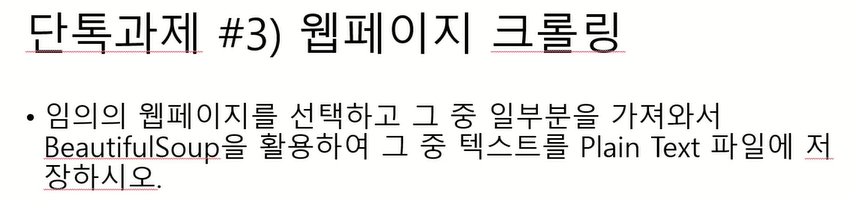

In [250]:
# 사람인 "데이터" 키워드 포지션 검색
url = 'https://www.saramin.co.kr/zf_user/search?search_area=main&search_done=y&search_optional_item=n&searchType=search&searchword=%EB%8D%B0%EC%9D%B4%ED%84%B0'

response = requests.get(url)
print(response)

soup = BeautifulSoup(response.content, 'html')

# 포지션, 기업명 데이터 추출
jot_title = soup.select('div.area_job > h2 > a')
company = soup.select('div.area_corp > strong > a > span')

# week_9_hw3라는 이름으로 plain text 파일에 저장
data_file  = open('../data/week9_hw3.txt', 'w', encoding='utf-8-sig')

# 추후 csv로 불러오기 편하도록 쉼표로 구분
for i, j in zip(jot_title, company):
    line = "포지션: "+i.text + ",기업명: "+j.text+"\n"
    data_file.write(line)
data_file.close()

<Response [200]>


C:\Users\Kim\AppData\Roaming\Python\Python37\site-packages\bs4\__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file C:\ProgramData\Anaconda3\lib\runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))
